# Setting up the Enviroment

In [1]:
# import packages
import langdetect
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import numpy as np
import pandas as pd
import pyLDAvis
import pyLDAvis.sklearn
import regex
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# install to word dictionaries
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hevans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hevans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Loading

In [3]:
df = pd.read_csv('datasets/News_Final.csv', header=0)
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [4]:
# defining a function to examine the data
def dataframe_quick_look(df, nrows):
    print(f"SHAPE:\n{df.shape}\n")
    print(f"COLUMN NAMES:\n{df.columns}\n")
    print(f"HEAD:\n{df.head(nrows)}\n")

In [5]:
# seeing the data
dataframe_quick_look(df, nrows=2)

SHAPE:
(93239, 11)

COLUMN NAMES:
Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn'],
      dtype='object')

HEAD:
    IDLink                                             Title  \
0  99248.0  Obama Lays Wreath at Arlington National Cemetery   
1  10423.0       A Look at the Health of the Chinese Economy   

                                            Headline     Source    Topic  \
0  Obama Lays Wreath at Arlington National Cemete...  USA TODAY    obama   
1  Tim Haywood, investment director business-unit...  Bloomberg  economy   

           PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
0  2002-04-02 00:00:00        0.000000          -0.053300        -1   
1  2008-09-20 00:00:00        0.208333          -0.156386        -1   

   GooglePlus  LinkedIn  
0          -1        -1  
1          -1        -1  



In [6]:
#  print the unique topic values and their number of occurrences
print('TOPICS:')
print(df['Topic'].value_counts())

TOPICS:
economy      33928
obama        28610
microsoft    21858
palestine     8843
Name: Topic, dtype: int64


In [7]:
# extract the headline data and transform the extracted data into a list object
raw = df['Headline'].tolist()

In [8]:
# Print the first five elements of the list and the list length to confirm that the extraction was successful
print(f'HEADLINES:\n{raw[:5]}')
print(f'LENGHT:\n{len(raw)}')

HEADLINES:
['Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor', 'Tim Haywood, investment director business-unit head for fixed income at Gam, discusses the China beige book and the state of the economy.', "Nouriel Roubini, NYU professor and chairman at Roubini Global Economics, explains why the global economy isn't facing the same conditions", "Finland's economy expanded marginally in the three months ended December, after contracting in the previous quarter, preliminary figures from Statistics Finland showed Monday. ", 'Tourism and public spending continued to boost the economy in January, in light of contraction in private consumption and exports, according to the Bank of Thailand data. ']
LENGHT:
93239


# Cleaning Data Step by Step

In [9]:
# Select the sixth headline
example = raw[5]
example

'Over 100 attendees expected to see latest version of Microsoft Dynamics SL and Dynamics GP (PRWeb February 29, 2016) Read the full story at http://www.prweb.com/releases/2016/03/prweb13238571.htm '

In [10]:
# create a function to detect the language
def lang_ident(txt):
    try: the_language = langdetect.detect(txt)
    except: the_language = 'none'
    return the_language

In [11]:
# identify the headline language
print(f"DETECTED LANGUAGE: {lang_ident(example)}")

DETECTED LANGUAGE: en


In [12]:
# Split the string containing the headline into pieces, called tokens, using the white spaces
example = example.split(' ')
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'http://www.prweb.com/releases/2016/03/prweb13238571.htm', '']


In [13]:
# Identify all URLs and replace the URLs with the 'URL' string
example = ['URL' if bool(regex.search('http[s]?://', i)) else i for i in example]
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [14]:
# replace all punctuation and newline symbols (\n) with empty strings
example = [regex.sub('^\\w\\s', '', i) for i in example]
print(example)

['Over', '100', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [15]:
# Replace all numbers with empty strings
example = [regex.sub('^[0-9]*$', '', i) for i in example]
print(example)

['Over', '', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'Microsoft', 'Dynamics', 'SL', 'and', 'Dynamics', 'GP', '(PRWeb', 'February', '29,', '2016)', 'Read', 'the', 'full', 'story', 'at', 'URL', '']


In [16]:
# Change all uppercase letters to lowercase
example = [i.lower() if i not in ['URL'] else i for i in example]
print(example)

['over', '', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'microsoft', 'dynamics', 'sl', 'and', 'dynamics', 'gp', '(prweb', 'february', '29,', '2016)', 'read', 'the', 'full', 'story', 'at', 'URL', '']


In [17]:
# remove the 'URL' string
example = [i for i in example if i not in ['URL', '']]
print(example)

['over', 'attendees', 'expected', 'to', 'see', 'latest', 'version', 'of', 'microsoft', 'dynamics', 'sl', 'and', 'dynamics', 'gp', '(prweb', 'february', '29,', '2016)', 'read', 'the', 'full', 'story', 'at']


In [18]:
# Load in the stopwords dictionary from nltk
list_stop_words = nltk.corpus.stopwords.words('english')
list_stop_words = [regex.sub('[^\\w\\s]', '', i) for i in list_stop_words]
print(list_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [19]:
# remove all stop words from the headline
example = [i for i in example if i not in list_stop_words]
print(example)

['attendees', 'expected', 'see', 'latest', 'version', 'microsoft', 'dynamics', 'sl', 'dynamics', 'gp', '(prweb', 'february', '29,', '2016)', 'read', 'full', 'story']


In [20]:
# create a lemmatization function
def do_lemmatizing(wrd):
    out = nltk.corpus.wordnet.morphy(wrd)
    return (wrd if out is None else out)

The morphy function takes each individual word in a text and returns its standard form if it recognizes it.

In [21]:
# perform lemmatization
example = [do_lemmatizing(i) for i in example]
print(example)

['attendee', 'expect', 'see', 'latest', 'version', 'microsoft', 'dynamics', 'sl', 'dynamics', 'gp', '(prweb', 'february', '29,', '2016)', 'read', 'full', 'story']


In [22]:
# Remove all words with a length of four or less from the list of tokens
example = [i for i in example if len(i) >= 5]
print(example)

['attendee', 'expect', 'latest', 'version', 'microsoft', 'dynamics', 'dynamics', '(prweb', 'february', '2016)', 'story']


The assumption around this step is that short words are, in general, more common and therefore will not drive the types of insights we are looking to extract from the topic models. Note that removing words of certain lengths is not a technique that should be used all the time; it is for specific cases only. For example, short words can sometimes be very indicative of topics such as in the case of identifying animals (for example, dog, cat, bird).

# Complete Data Cleaning

In [23]:
# Define a function that contains all the individual steps of the cleaning process
def headline_cleaning(txt):
    
    # identify the language
    lg = lang_ident(txt)
    if lg != 'en':
        return None
    
    # split the string
    out = txt.split(' ')
    
    # identify urls and replace by 'URL'
    out = ['URL' if bool(regex.search('http[s]?://', i)) else i for i in out]
    
    # remove ponctuation
    out = [regex.sub('^\\w\\s', '', i) for i in out]
    
    # remove numbers
    out = [regex.sub('^[0-9]*$', '', i) for i in out]
    
    # convert to lowercase
    out = [i.lower() if i not in ['URL'] else i for i in out]
    
    #remove 'URL'
    out = [i for i in out if i not in ['URL', '']]
    
    # remove stopwords
    list_stop_words = nltk.corpus.stopwords.words("english")
    list_stop_words = [regex.sub("[^\\w\\s]", "", i) for i in list_stop_words]
    
    out = [i for i in out if i not in list_stop_words]
    
    # lemmatizing
    out = [do_lemmatizing(i) for i in out]
    
    # remove words if less than 5 characters
    out = [i for i in out if len(i) >= 5]
    
    return out

In [24]:
# import package
from time import time

In [25]:
# Execute the function on each headline
tick = time()
clean = list(map(headline_cleaning, raw))
print(time() - tick)

904.2484571933746


In [26]:
# remove all None types
clean = list(filter(None.__ne__, clean))

In [27]:
print(f'HEADLINES:\n{clean[:5]}')
print(f'LENGTH:/n{len(clean)}')

HEADLINES:
[['obama', 'wreath', 'arlington', 'national', 'cemetery.', 'president', 'barack', 'obama', 'wreath', 'unknown', 'honor'], ['haywood,', 'investment', 'director', 'business-unit', 'income', 'discus', 'china', 'beige', 'state', 'economy.'], ['nouriel', 'roubini,', 'professor', 'chairman', 'roubini', 'global', 'economics,', 'explain', 'global', 'economy', "isn't", 'facing', 'conditions'], ["finland's", 'economy', 'expand', 'marginally', 'three', 'month', 'december,', 'contracting', 'previous', 'quarter,', 'preliminary', 'figure', 'statistics', 'finland', 'monday.'], ['tourism', 'public', 'spending', 'continue', 'boost', 'economy', 'january,', 'light', 'contraction', 'private', 'consumption', 'exports,', 'accord', 'thailand', 'data.']]
LENGTH:/n92941


In [28]:
# For every individual headline, concatenate the tokens using a white space separator
clean_sentences = [' '.join(i) for i in clean]
print(clean_sentences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Creating a Bag-of-Words Model Using the Count Vectorizer

In [29]:
# define hyperparameters
number_words = 10
number_docs = 10
number_features = 1000

In [30]:
# Run the count vectorizer and print the output
vectorizer1 = sklearn.feature_extraction.text.CountVectorizer(analyzer='word',
                                                             max_df=0.5,
                                                             min_df=20,
                                                             max_features=number_features)

In [31]:
clean_vec1 = vectorizer1.fit_transform(clean_sentences)
print(clean_vec1[0])

  (0, 577)	2
  (0, 560)	1
  (0, 651)	1
  (0, 91)	1


In [32]:
# Extract the feature names and the words from the vectorizer
feature_names_vec1 = vectorizer1.get_feature_names()

# Selecting the Number of Topics

In [36]:
# Define a function that fits an LDA model on various numbers of topics and computes the perplexity score
def perplexity_by_ntopic(data, ntopics):
    output_dict = {"Number Of Topics": [], "Perplexity Score": []}
      
    for t in ntopics:
        lda = sklearn.decomposition.LatentDirichletAllocation(n_components=t,
                                                                  learning_method="online",
                                                                  random_state=0)
        lda.fit(data)
        output_dict["Number Of Topics"].append(t)
        output_dict["Perplexity Score"].append(lda.perplexity(data))
            
        output_df = pd.DataFrame(output_dict)
        index_min_perplexity = output_df["Perplexity Score"].idxmin()
        output_num_topics = output_df.loc[index_min_perplexity, "Number Of Topics"]
        
    return (output_df, output_num_topics)

In [37]:
# execute the function
df_perplexity, optimal_num_topics = perplexity_by_ntopic(clean_vec1, ntopics=[1, 2, 3, 4, 6, 8, 10])
print(df_perplexity)

   Number Of Topics  Perplexity Score
0                 1        498.001120
1                 2        454.336813
2                 3        403.147737
3                 4        411.871584
4                 6        489.659919
5                 8        536.254348
6                10        560.726469


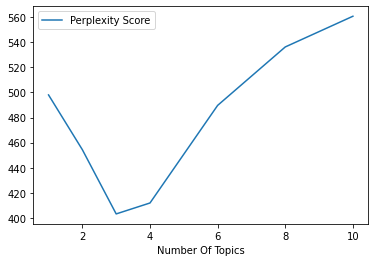

In [38]:
# Plot the perplexity scores
df_perplexity.plot.line('Number Of Topics', 'Perplexity Score')
plt.show()

The ideal number of topics is 3

# Running LDA

In [41]:
# fit an LDA model using the optimal number of topics
lda = sklearn.decomposition.LatentDirichletAllocation(n_components=optimal_num_topics,
                                                      learning_method="online",
                                                      random_state=0)
lda.fit(clean_vec1)

LatentDirichletAllocation(learning_method='online', n_components=3,
                          random_state=0)

In [42]:
# Output the topic-document matrix and its shape
lda_transform = lda.transform(clean_vec1)
print(lda_transform.shape)
print(lda_transform)

(92941, 3)
[[0.05555566 0.88809796 0.05634638]
 [0.03886921 0.04007839 0.9210524 ]
 [0.04168544 0.03949483 0.91881973]
 ...
 [0.03984368 0.65212376 0.30803256]
 [0.06929142 0.86098456 0.06972402]
 [0.58422459 0.36544718 0.05032823]]


In [43]:
# Output the word-topic matrix and its shape
print(lda.components_.shape)
print(lda.components_)

(3, 1000)
[[2.74769062e+02 1.28199616e+02 1.35811176e+02 ... 2.03949303e+02
  7.29348454e+02 4.24095894e+01]
 [4.39229147e+01 1.25953700e+02 9.72587191e+01 ... 1.84317056e+02
  3.50369985e-01 4.24010332e+02]
 [7.79452059e+02 8.63937850e+01 1.84021260e+02 ... 1.23591530e+02
  3.41477499e-01 3.86382460e-01]]


In [44]:
# Define a function that formats the two output matrices into easy-to-read tables
def get_topics(mod, vec, names, docs, ndocs, nwords):
    
    # word to topic matrix
    W = mod.components_
    W_norm = W / W.sum(axis=1)[:, np.newaxis]
    
    # topic to document matrix
    H = mod.transform(vec)
    
    W_dict = {}
    H_dict = {}
    
    for tpc_idx, tpc_val in enumerate(W_norm):
        topic = "Topic{}".format(tpc_idx)
        
        # formatting w
        W_indices = tpc_val.argsort()[::-1][:nwords]
        W_names_values = [
            (round(tpc_val[j], 4), names[j]) 
            for j in W_indices
        ]
        W_dict[topic] = W_names_values
        
        # formatting h
        H_indices = H[:, tpc_idx].argsort()[::-1][:ndocs]
        H_names_values = [
            (round(H[:, tpc_idx][j], 4), docs[j]) 
            for j in H_indices
        ]
        H_dict[topic] = H_names_values
        
    W_df = pd.DataFrame(
        W_dict, 
        index=["Word" + str(i) for i in range(nwords)]
    )
    H_df = pd.DataFrame(
        H_dict,
        index=["Doc" + str(i) for i in range(ndocs)]
    )
        
    return (W_df, H_df)

In [45]:
# Execute the function
W_df, H_df = get_topics(mod=lda,
                        vec=clean_vec1,
                        names=feature_names_vec1,
                        docs=raw,
                        ndocs=number_docs,
                        nwords=number_words)

In [46]:
# Print out the word-topic DataFrame
print(W_df)

                    Topic0                 Topic1              Topic2
Word0  (0.1146, microsoft)        (0.0978, obama)   (0.0949, economy)
Word1    (0.0222, windows)    (0.0735, president)  (0.0325, economic)
Word2    (0.0207, company)        (0.042, barack)      (0.0172, quot)
Word3   (0.0143, announce)         (0.0266, quot)    (0.0168, growth)
Word4      (0.0134, today)    (0.0165, palestine)    (0.0139, global)
Word5       (0.0123, quot)        (0.0128, state)      (0.011, china)
Word6    (0.0096, release)  (0.0128, palestinian)   (0.0102, percent)
Word7   (0.0082, business)    (0.012, washington)     (0.0102, world)
Word8      (0.008, update)        (0.0109, house)  (0.01, government)
Word9      (0.0076, cloud)          (0.01, white)   (0.0096, quarter)


In [47]:
# Print out the topic-document DataFrame
print(H_df)

                                                 Topic0  \
Doc0  (0.9781, By: Keaton Schmitt The Minnesota Stud...   
Doc1  (0.9776, The legal showdown over the Obama adm...   
Doc2  (0.9771, On June 5 th , The Palestine Children...   
Doc3  (0.9771, Economy Secretary Keith Brown will vi...   
Doc4  (0.9769, Microsoft Edge features a hidden menu...   
Doc5  (0.9767, Japan’s surprise, albeit modest, meas...   
Doc6  (0.9763, In his speech to the nation about the...   
Doc7  (0.976, Tilton, New Hampshire (CNN) Jeb Bush s...   
Doc8  (0.9759, NEW DELHI: Buoyed by impressive GDP n...   
Doc9  (0.9758, The importance of a first good impres...   

                                                 Topic1  \
Doc0  (0.9814, PARIS (JTA) """ French Jews accused t...   
Doc1  (0.9793, LACKAWANNA COUNTY -- The race for pre...   
Doc2  (0.9793, Horacio Gutierrez, the top lawyer at ...   
Doc3  (0.9793, President Barack Obama will announce ...   
Doc4  (0.9786, The IMF said Germany's economic growt...

# Visualizing LDA

In [48]:
# Run and display pyLDAvis
lda_plot = pyLDAvis.sklearn.prepare(lda, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda_plot)

In [51]:
# Define a function that fits a t-SNE model and then plots the results
def plot_tsne(data, threshold):
    
    # filter data according to threshold
    index_meet_threshold = np.amax(data, axis=1) >= threshold
    lda_transform_filt = data[index_meet_threshold]
    
    # fit tsne model
    tsne = sklearn.manifold.TSNE(
        n_components=2, 
        verbose=0, 
        random_state=0, 
        angle=0.5, 
        init='pca'
    )
    tsne_fit = tsne.fit_transform(lda_transform_filt)
    
    # most probable topic for each headline
    most_prob_topic = []
    for i in range(tsne_fit.shape[0]):
        most_prob_topic.append(lda_transform_filt[i].argmax())
    
    print(f"LENGTH:\n{len(most_prob_topic)}\n")

    unique, counts = np.unique(
        np.array(most_prob_topic), 
        return_counts=True
    )

    print(f"COUNTS:\n{np.asarray((unique, counts)).T}\n")
    
    # make plot
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i in list(set(most_prob_topic)):
        indices = [idx for idx, val in enumerate(most_prob_topic) if val == i]
        plt.scatter(
            x=tsne_fit[indices, 0], 
            y=tsne_fit[indices, 1], 
            s=0.5, 
            c=color_list[i], 
            label='Topic' + str(i),
            alpha=0.25
        )

    plt.xlabel('x-tsne')
    plt.ylabel('y-tsne')
    plt.legend(markerscale=10)

LENGTH:
58645

COUNTS:
[[    0 15355]
 [    1 23875]
 [    2 19415]]



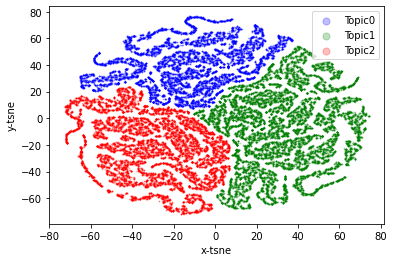

In [52]:
# execute the function
plot_tsne(data=lda_transform, threshold=0.75)

# Trying Four Topics

In [53]:
# Run an LDA model with four topics
lda4 = sklearn.decomposition.LatentDirichletAllocation(n_components=4,
                                                      learning_method='online',
                                                      random_state=0)
lda4.fit(clean_vec1)

LatentDirichletAllocation(learning_method='online', n_components=4,
                          random_state=0)

In [54]:
# Execute the get_topics function to produce the more readable word-topic and topic-document tables
W_df4, H_df4 = get_topics(mod=lda4,
                          vec=clean_vec1,
                          names=feature_names_vec1,
                          docs=raw,
                          ndocs=number_docs,
                          nwords=number_words)

In [55]:
# print the word-topic table
print(W_df4)

                    Topic0                 Topic1                Topic2  \
Word0  (0.1197, microsoft)     (0.036, palestine)     (0.1117, economy)   
Word1    (0.0232, windows)  (0.0279, palestinian)    (0.0369, economic)   
Word2    (0.0216, company)        (0.0216, state)      (0.0198, growth)   
Word3   (0.0175, announce)     (0.0212, minister)        (0.0181, quot)   
Word4      (0.0101, today)        (0.0143, unite)      (0.0163, global)   
Word5    (0.0098, release)     (0.0137, national)        (0.013, china)   
Word6   (0.0085, business)     (0.0135, european)      (0.012, percent)   
Word7     (0.0084, update)        (0.013, nation)     (0.0113, quarter)   
Word8      (0.0079, cloud)        (0.0129, union)       (0.0107, world)   
Word9    (0.0074, surface)       (0.0123, israel)  (0.0103, government)   

                         Topic3  
Word0           (0.1391, obama)  
Word1       (0.1045, president)  
Word2          (0.0597, barack)  
Word3            (0.0521, quot)  
Word

In [56]:
# print the document-topic table
print(H_df4)

                                                 Topic0  \
Doc0  (0.975, The legal showdown over the Obama admi...   
Doc1  (0.9731, NEW DELHI: Buoyed by impressive GDP n...   
Doc2  (0.9726, IN the last two years, the US economy...   
Doc3  (0.9719, The protection of American oil intere...   
Doc4  (0.9718, &quot;We do need to drive up the leve...   
Doc5  (0.9717, If you have been ever so lazy to chan...   
Doc6  (0.9715, On Wednesday, Microsoft continued its...   
Doc7  (0.971, """When I began working on this concep...   
Doc8  (0.971, The Estonian economy was also positive...   
Doc9  (0.971, 2 economy could be sucked into a Japan...   

                                                 Topic1  \
Doc0  (0.9683, Just recently I wrote about my busine...   
Doc1  (0.9655, The University of Michigan Survey of ...   
Doc2  (0.9554, """Tax hikes, amnesty, the Republican...   
Doc3  (0.9526, Unlike China's debt binge at the end ...   
Doc4  (0.9524, CATONSVILLE, Md. (AP) - President Bar...

In [57]:
# Display the results of the LDA model using pyLDAvis
lda4_plot = pyLDAvis.sklearn.prepare(lda4, clean_vec1, vectorizer1, R=10)
pyLDAvis.display(lda4_plot)

# Creating a Bag-of-Words Model Using TF-IDF

In [58]:
# Run the TF-IDF vectorizer
vectorizer2 = sklearn.feature_extraction.text.TfidfVectorizer(analyzer="word",
                                                              max_df=0.5,
                                                              min_df=20,
                                                              max_features=number_features,
                                                              smooth_idf=False)

In [59]:
clean_vec2 = vectorizer2.fit_transform(clean_sentences)
print(clean_vec2[0])

  (0, 91)	0.38552085750190007
  (0, 651)	0.32177607929117913
  (0, 560)	0.6400124498874733
  (0, 577)	0.5815650326627546


In [60]:
# Return the feature names
feature_names_vec2 = vectorizer2.get_feature_names()
feature_names_vec2

['000',
 '10',
 '2014',
 '2015',
 '2016',
 'abbas',
 'ability',
 'accept',
 'access',
 'accord',
 'account',
 'achieve',
 'acquire',
 'acquisition',
 'across',
 'action',
 'activist',
 'activity',
 'actually',
 'address',
 'administration',
 'advance',
 'adviser',
 'affairs',
 'affect',
 'afp',
 'africa',
 'african',
 'afternoon',
 'agency',
 'agenda',
 'agree',
 'agreement',
 'ahead',
 'al',
 'all',
 'allies',
 'allow',
 'almost',
 'along',
 'already',
 'although',
 'always',
 'amazon',
 'america',
 'american',
 'among',
 'amp',
 'analysis',
 'analyst',
 'and',
 'android',
 'anniversary',
 'announce',
 'announcement',
 'annual',
 'another',
 'answer',
 'anti',
 'antonin',
 'appeal',
 'appear',
 'apple',
 'application',
 'approach',
 'april',
 'arabia',
 'argentina',
 'argue',
 'around',
 'arrive',
 'article',
 'asia',
 'asian',
 'assistant',
 'association',
 'attack',
 'attempt',
 'attend',
 'attention',
 'australia',
 'australian',
 'author',
 'authorities',
 'authority',
 'available

# Non-negative Matrix Factorization

In [61]:
# Define the NMF model
nmf = sklearn.decomposition.NMF(n_components=4,
                                init="nndsvda",
                                solver="mu",
                                beta_loss="frobenius",
                                random_state=0,
                                alpha=0.1,
                                l1_ratio=0.5)
nmf.fit(clean_vec2)

NMF(alpha=0.1, init='nndsvda', l1_ratio=0.5, n_components=4, random_state=0,
    solver='mu')

In [62]:
# Run the get_topics functions
W_df, H_df = get_topics(mod=nmf,
                        vec=clean_vec2,
                        names=feature_names_vec2,
                        docs=raw,
                        ndocs=number_docs,
                        nwords=number_words)

In [63]:
# print the W table
print(W_df)

                         Topic0                Topic1               Topic2  \
Word0           (0.0704, obama)     (0.0565, economy)  (0.0869, microsoft)   
Word1       (0.0624, president)    (0.0204, economic)    (0.0296, windows)   
Word2          (0.0462, barack)      (0.0168, growth)     (0.018, company)   
Word3      (0.0153, washington)      (0.0132, global)   (0.0144, announce)   
Word4           (0.0146, house)       (0.0119, china)     (0.0108, update)   
Word5           (0.0138, white)     (0.0104, percent)    (0.0099, surface)   
Word6           (0.0106, state)         (0.01, world)    (0.0095, release)   
Word7  (0.0094, administration)     (0.0097, quarter)      (0.0094, cloud)   
Word8           (0.0081, visit)        (0.0085, year)      (0.0093, today)   
Word9            (0.008, first)  (0.0081, government)   (0.0081, software)   

                    Topic3  
Word0       (0.4213, quot)  
Word1        (0.0215, the)  
Word2          (0.014, we)  
Word3       (0.0136, said

In [64]:
# print the H table
print(H_df)

                                                 Topic0  \
Doc0  (0.0795, T) admitted to manipulating test data...   
Doc1  (0.0795, The Palestinian academic community ho...   
Doc2  (0.0795, Two-time Pulitzer Prize winning carto...   
Doc3  (0.0795, But the sagging Canadian economy has ...   
Doc4  (0.0795, ECONOMY, Pa. (AP) — A western Pennsyl...   
Doc5  (0.0795, Marnell said the poor local economy i...   
Doc6  (0.0795, Major business groups are suing the O...   
Doc7  (0.0795, LinkedIn has the user data and focus ...   
Doc8  (0.0795, Though a closely watched survey of bu...   
Doc9  (0.0739, THE Treasury has revised down its eco...   

                                                 Topic1  \
Doc0  (0.0631, Moscow has called on Israeli and Pale...   
Doc1  (0.0631, President Barack Obama takes part Wed...   
Doc2  (0.0631, Both China's central bank and a respe...   
Doc3  (0.0631, In the past, Chinese authorities have...   
Doc4  (0.0631, It was clear at launch all the way ba...

# Visualizing NMF

In [65]:
# Run transform on the cleaned data to get the topic-document allocations
nmf_transform = nmf.transform(clean_vec2)
print(nmf_transform.shape)
print(nmf_transform)

(92941, 4)
[[6.45624997e-02 7.57641588e-15 9.73164664e-37 1.50642869e-35]
 [5.27742304e-04 2.04748189e-02 6.06978272e-05 1.19555356e-14]
 [4.81003457e-14 1.72416534e-02 2.35385238e-14 2.26882562e-21]
 ...
 [1.73439996e-03 6.67553920e-03 1.26751395e-03 2.65013962e-06]
 [2.61558350e-03 4.65138303e-03 6.76049995e-04 5.79368335e-04]
 [1.87576276e-04 3.45095037e-04 1.69150175e-02 4.53200961e-16]]


LENGTH:
92941

COUNTS:
[[    0 27895]
 [    1 36136]
 [    2 21408]
 [    3  7502]]



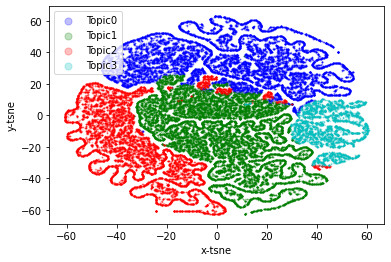

In [66]:
# Run the plot_tsne function
plot_tsne(data=nmf_transform, threshold=0)